In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [116]:
df=pd.read_csv('train.csv')
df.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


<Axes: >

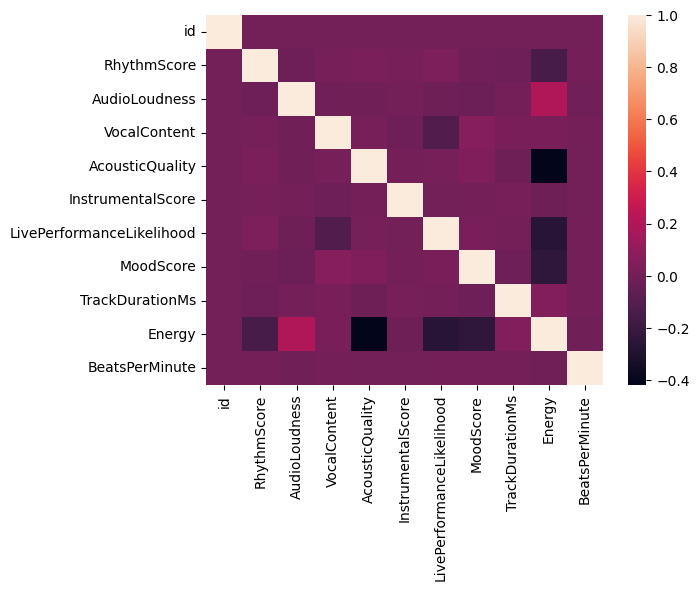

In [118]:
corr=df.corr()
sns.heatmap(corr)

In [119]:
df.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257587,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


In [120]:
df.isnull().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

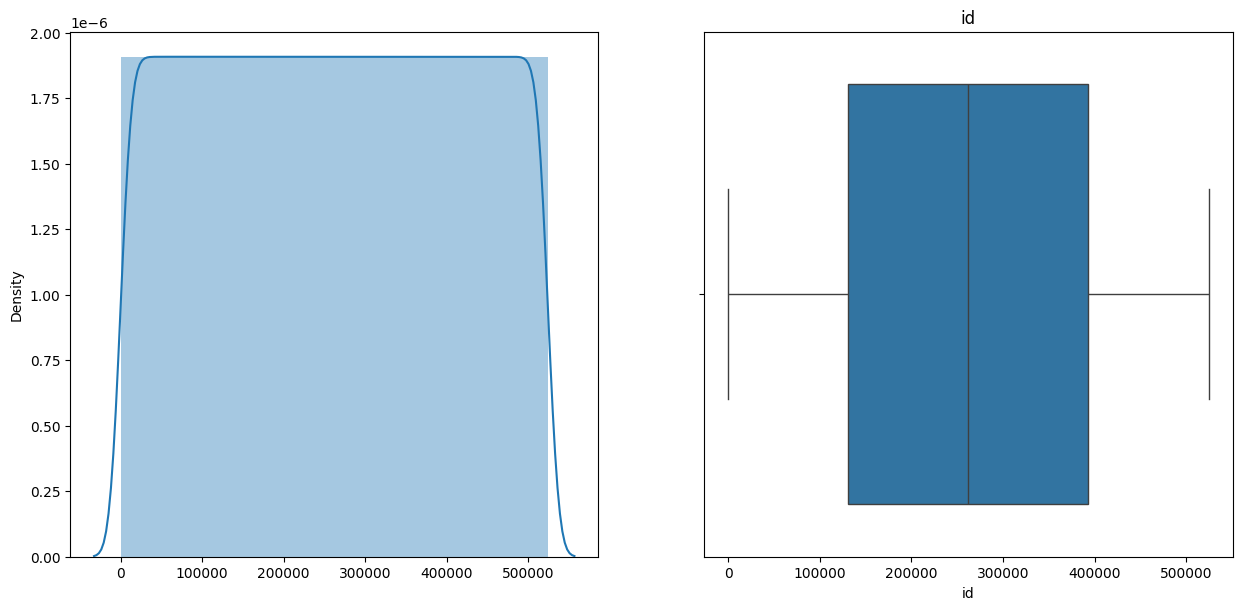

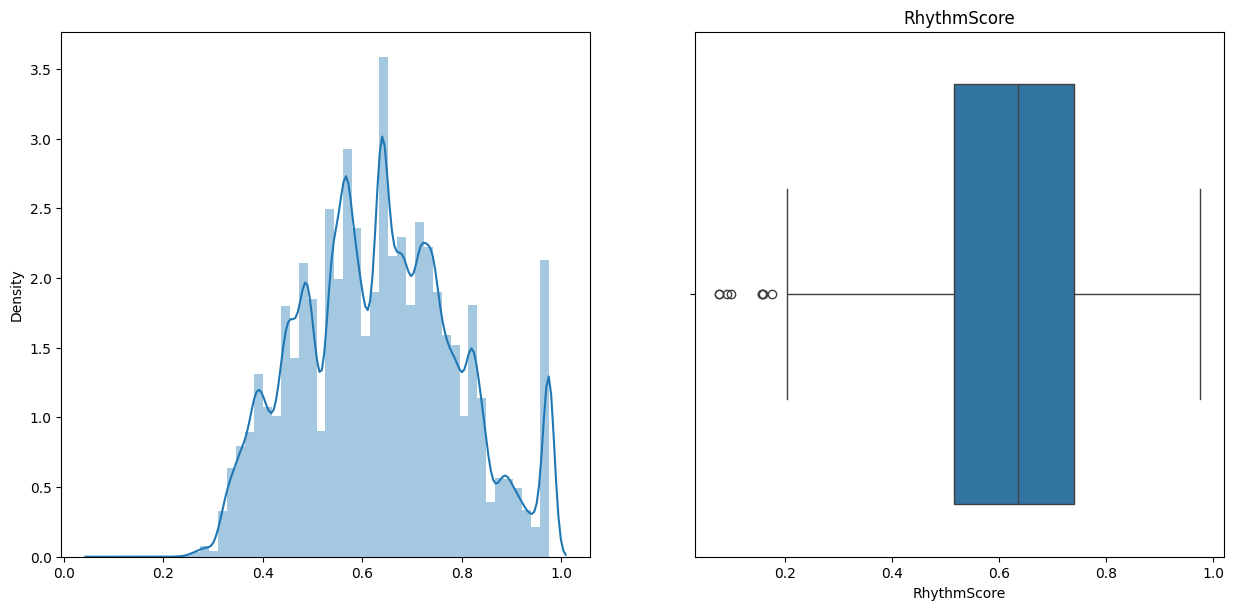

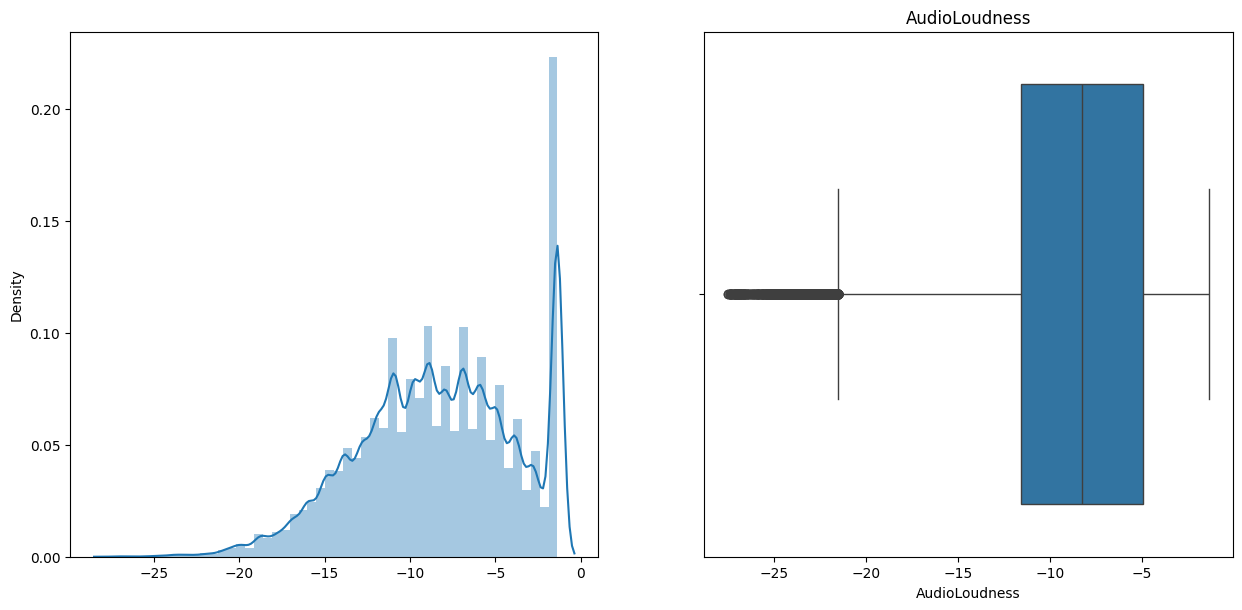

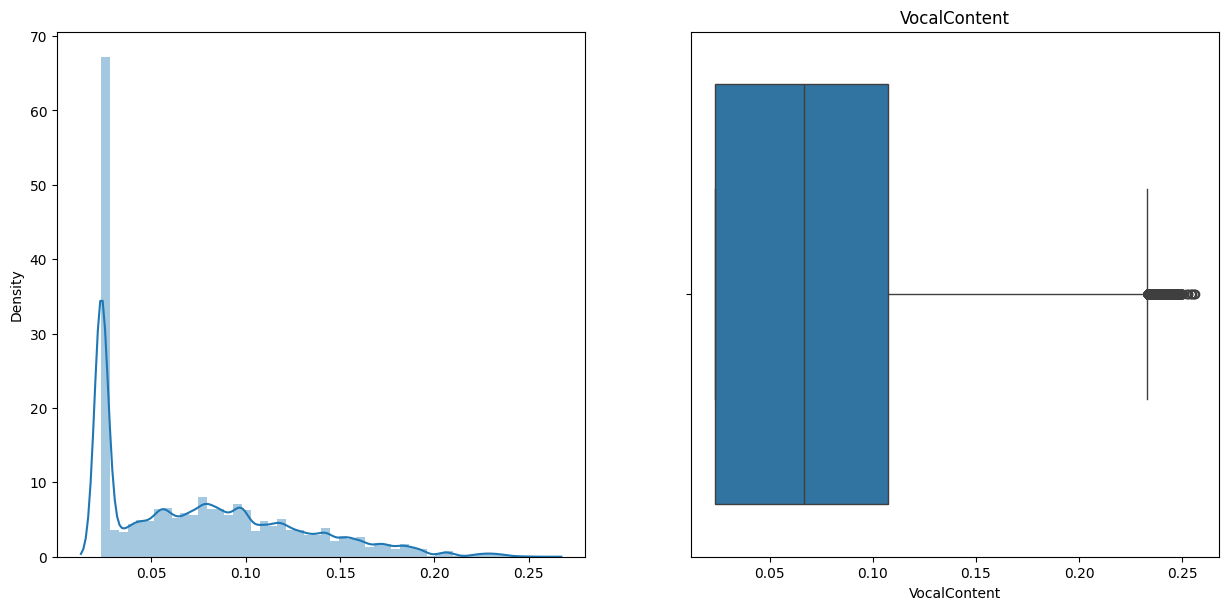

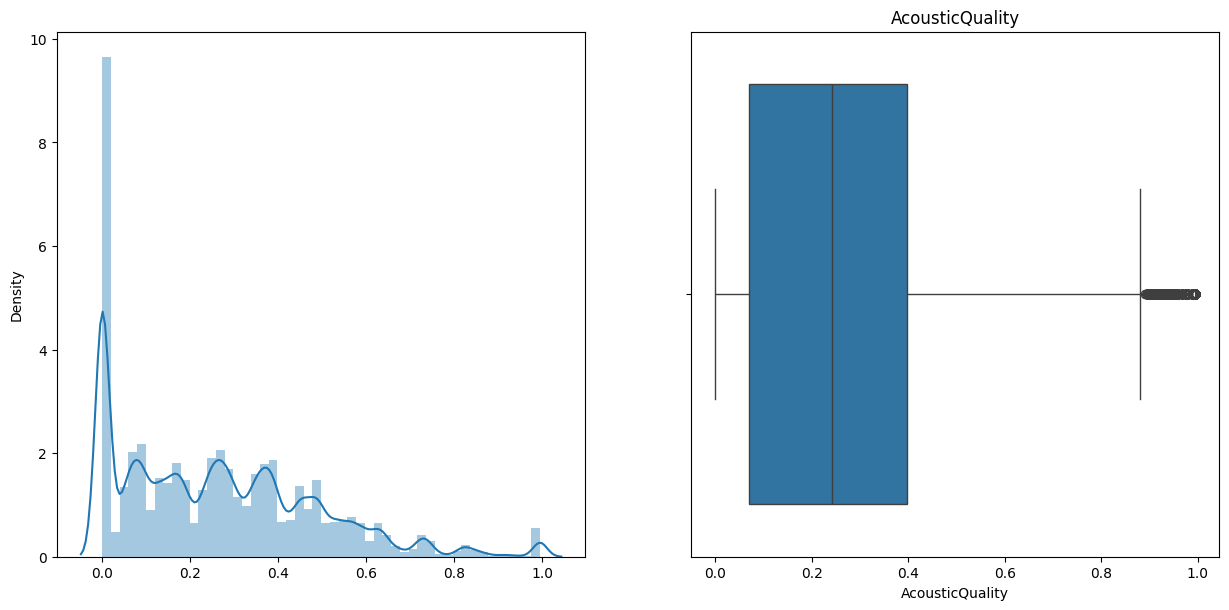

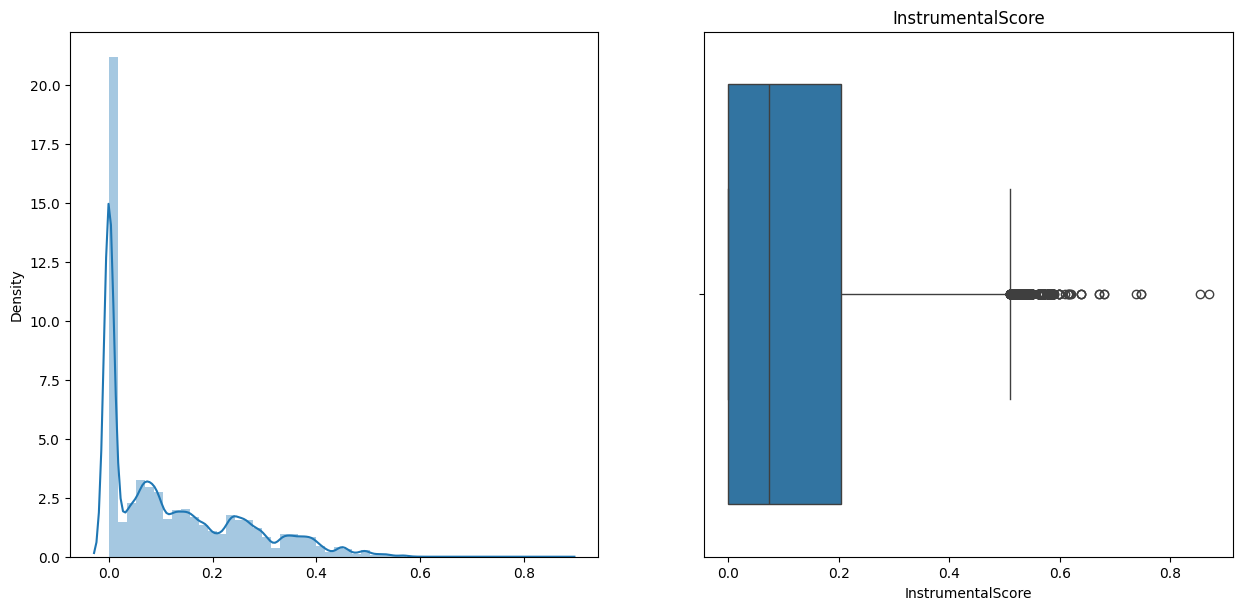

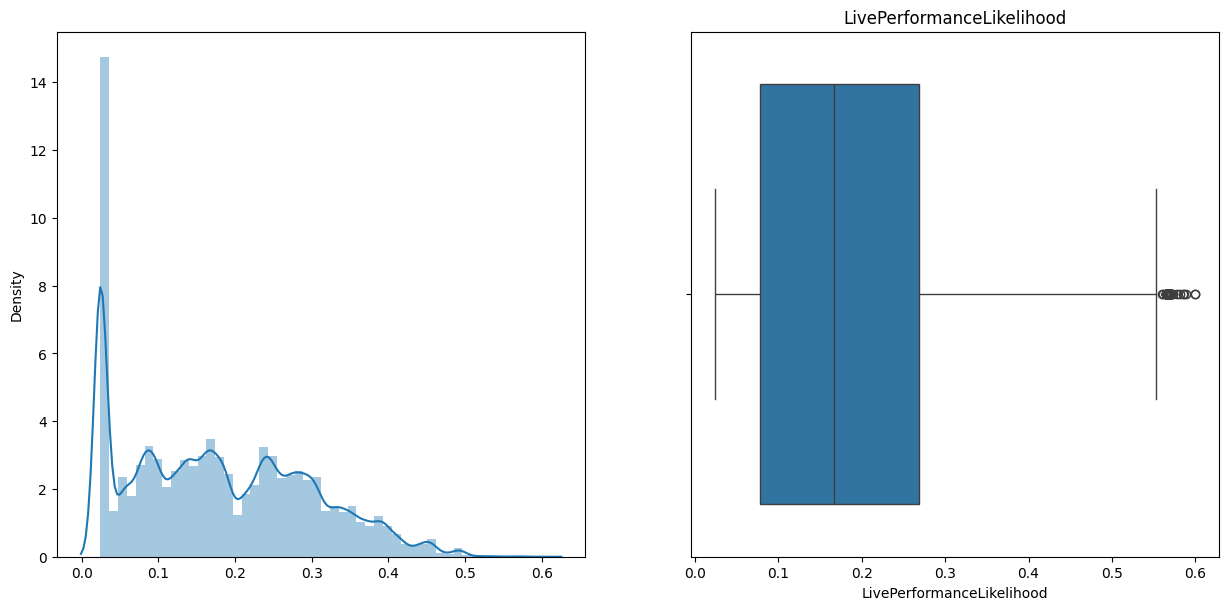

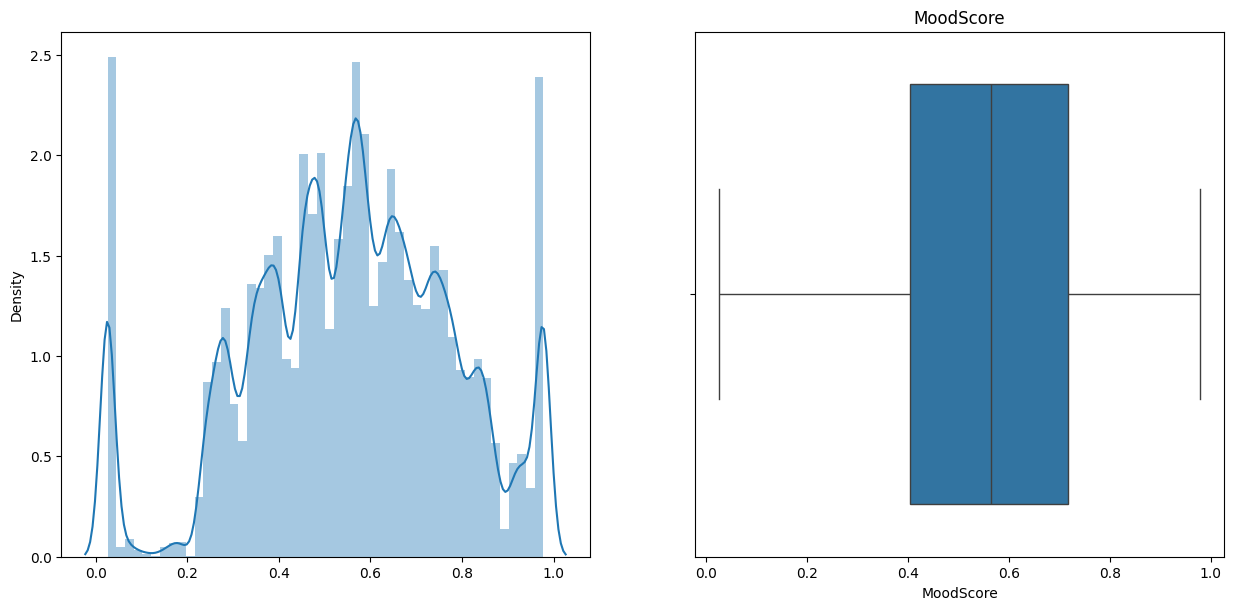

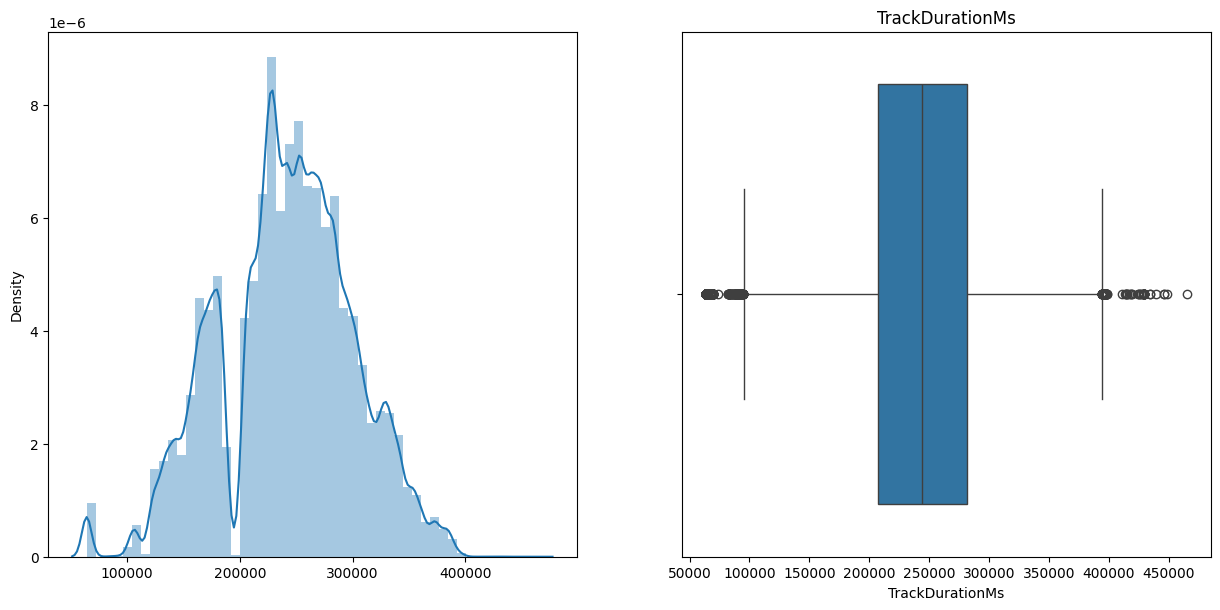

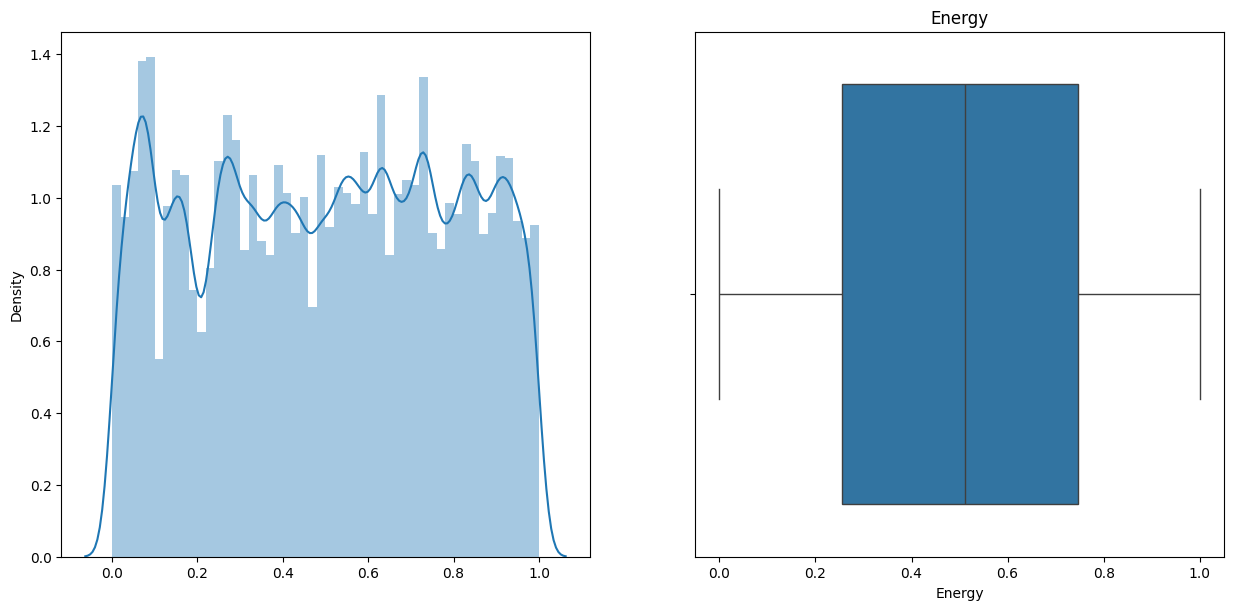

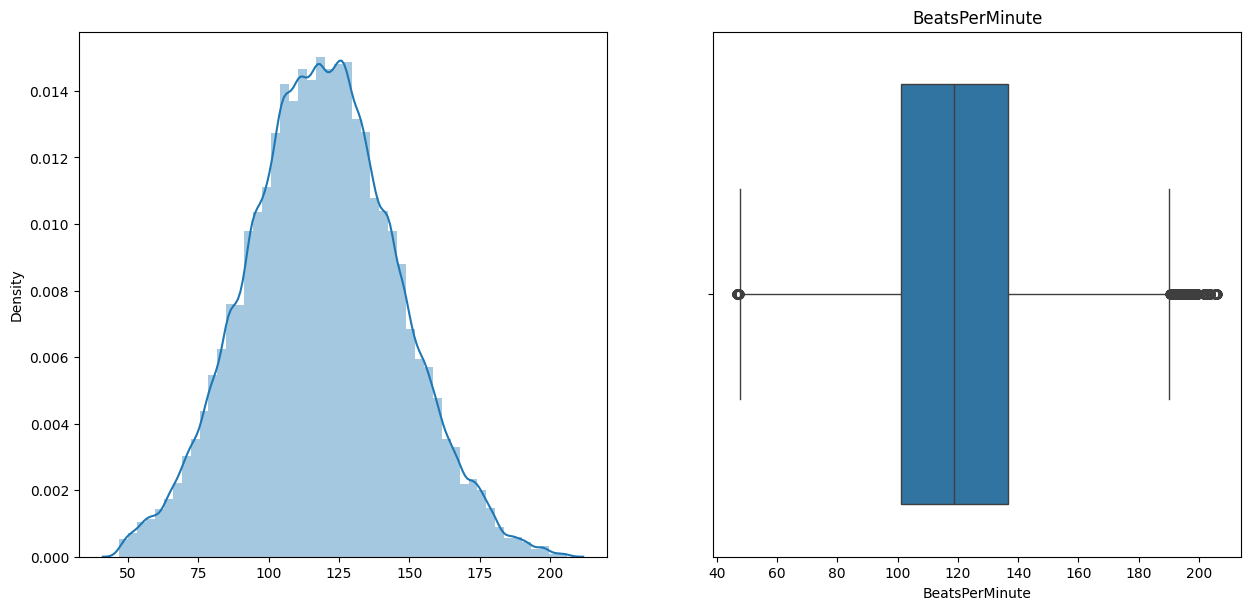

In [121]:
for col in df.columns:
    plt.figure(figsize=(15,15))
    plt.subplot(221)
    sns.distplot(x=df[col])
    plt.subplot(222)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [122]:
df.columns

Index(['id', 'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute'],
      dtype='object')

In [123]:
df['RhythmScore_AudioLoudness_interaction']=df['RhythmScore']*df['AudioLoudness']
df['VocalContent_AcousticQuality_ratio']=df['VocalContent']/df['AcousticQuality']
df['Energy_MoodScore_interaction']=df['MoodScore']*df['Energy']
df['InstrumentalScore_LivePerformanceLikelihood_interaction']=df['InstrumentalScore']*df['LivePerformanceLikelihood']+1e-6

In [124]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method='yeo-johnson')
transfomation_cols=['TrackDurationMs','RhythmScore_AudioLoudness_interaction','VocalContent_AcousticQuality_ratio','Energy_MoodScore_interaction','InstrumentalScore_LivePerformanceLikelihood_interaction']
for col in transfomation_cols:
    df[f'{col}_log']=pt.fit_transform(df[[col]])
df.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute,RhythmScore_AudioLoudness_interaction,VocalContent_AcousticQuality_ratio,Energy_MoodScore_interaction,InstrumentalScore_LivePerformanceLikelihood_interaction,TrackDurationMs_log,RhythmScore_AudioLoudness_interaction_log,VocalContent_AcousticQuality_ratio_log,Energy_MoodScore_interaction_log,InstrumentalScore_LivePerformanceLikelihood_interaction_log
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020,-4.609732,4384.328358,0.338659,0.000001,0.820466,0.046874,2.041346,0.563166,-0.963610
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963,-10.402336,0.160744,0.094657,0.059584,-1.295067,-1.402455,-0.632898,-0.905859,1.558269
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989,-8.208718,0.637394,0.264774,0.013423,-1.137917,-0.925723,-0.171192,0.189586,0.116639
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212,-0.996666,32.083499,0.135879,0.013795,-0.304118,1.587178,1.634781,-0.604164,0.139879
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511,-6.958670,0.342132,0.452607,0.000001,-0.497633,-0.620947,-0.427460,1.051306,-0.963580


In [125]:
# for col in df.columns:
#     plt.figure(figsize=(15,15))
#     plt.subplot(221)
#     sns.distplot(x=df[col])
#     plt.subplot(222)
#     sns.boxplot(x=df[col])
#     plt.title(col)
#     plt.show()

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [127]:
df.drop(columns=['id'],inplace=True)

In [128]:
x=df.drop(columns=['BeatsPerMinute'])
y=df.BeatsPerMinute

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [129]:
x.columns

Index(['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'RhythmScore_AudioLoudness_interaction',
       'VocalContent_AcousticQuality_ratio', 'Energy_MoodScore_interaction',
       'InstrumentalScore_LivePerformanceLikelihood_interaction',
       'TrackDurationMs_log', 'RhythmScore_AudioLoudness_interaction_log',
       'VocalContent_AcousticQuality_ratio_log',
       'Energy_MoodScore_interaction_log',
       'InstrumentalScore_LivePerformanceLikelihood_interaction_log'],
      dtype='object')

In [130]:
out_cols=['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality', 'InstrumentalScore', 'LivePerformanceLikelihood', 'TrackDurationMs']

In [131]:
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df= df[(df[col] >= lower) & (df[col] <= upper)]  
    return df  
x = remove_outliers_iqr(x,out_cols)

In [132]:
def adjust_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col]= np.where(df[col]<lower, lower,
                     np.where(df[col]>upper,upper,df[col])) 
    return df  
x = adjust_outliers_iqr(x,out_cols)

In [133]:
# for col in out_cols:
#     sns.boxplot(x=x[col])
#     plt.show()

In [134]:
# for col in x.columns:
#     sns.distplot(x=x[col])
#     plt.show()

In [135]:
cols=x.columns
cols

Index(['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'RhythmScore_AudioLoudness_interaction',
       'VocalContent_AcousticQuality_ratio', 'Energy_MoodScore_interaction',
       'InstrumentalScore_LivePerformanceLikelihood_interaction',
       'TrackDurationMs_log', 'RhythmScore_AudioLoudness_interaction_log',
       'VocalContent_AcousticQuality_ratio_log',
       'Energy_MoodScore_interaction_log',
       'InstrumentalScore_LivePerformanceLikelihood_interaction_log'],
      dtype='object')

In [136]:
transformer=ColumnTransformer(transformers=[('TrackDurationMs',StandardScaler(),['TrackDurationMs'])],remainder='passthrough')

In [137]:
from sklearn.metrics import r2_score,root_mean_squared_error
from xgboost import XGBRegressor

In [138]:
from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'clf__n_estimators': [100, 200],
#     'clf__max_depth': [3, 5, 7],
#     'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'clf__subsample': [0.6, 0.8, 1.0],
#     'clf__colsample_bytree': [0.6, 0.8, 1.0],
#     'clf__gamma': [0, 1, 5]
# }

# xgb = XGBRegressor(use_label_encoder=False, eval_metric='logloss')

# pipe_xgb_grid = Pipeline([
#     ('transform', transformer),
#     ('clf', xgb)
# ])

# grid_xgb = GridSearchCV(
#     estimator=pipe_xgb_grid,
#     param_grid=param_grid,
#     cv=5,
#     scoring='neg_root_mean_squared_error',
#     verbose=1,
#     n_jobs=1
# )

# grid_xgb.fit(x_train, y_train)

# y_pred = grid_xgb.predict(x_test)
# root_mean_squared_error(y_test,y_pred)

In [139]:
# grid_xgb.best_params_

# XGB Regression

In [140]:
xg=XGBRegressor(colsample_bytree= 0.8,
 gamma= 0,
 learning_rate= 0.01,
 max_depth= 5,
 n_estimators= 200,
 subsample= 0.8,
 n_jobs=1,
 random_state=42)
pipe=Pipeline([
    ('transfrom',transformer),
    ('clf',xg)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
root_mean_squared_error(y_test,y_pred)

26.43995492050839

# LightBGM

In [141]:
from lightgbm import LGBMRegressor

gbm=LGBMRegressor(device='gpu',
    boosting_type='gbdt')
pipe1=Pipeline([
    ('transfrom',transformer),
    ('clf',gbm)
])
pipe1.fit(x_train,y_train)
y_pred=pipe1.predict(x_test)
root_mean_squared_error(y_test,y_pred)

26.445550726389826

In [ ]:
gbm=LGBMRegressor(device='gpu',
    boosting_type='gbdt')
pipe2=Pipeline([
    ('transfrom',transformer),
    ('clf',gbm)
])
param_grid = {
    'clf__num_leaves': [31, 63, 127],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__n_estimators': [500, 1000, 1500],
    'clf__max_depth': [-1, 10, 20],
    'clf__subsample': [0.8, 1.0],
    'clf__colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=pipe2,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=1
)


grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)
print("Best RMSE:", (-grid.best_score_)**0.5)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [ ]:
test=pd.read_csv("test.csv")
test.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,524164,0.410013,-16.794967,0.023500,0.232910,0.012689,0.271585,0.664321,302901.5498,0.424867
1,524165,0.463071,-1.357000,0.141818,0.057725,0.257942,0.097624,0.829552,221995.6643,0.846000
2,524166,0.686569,-3.368928,0.167851,0.287823,0.210915,0.325909,0.304978,357724.0127,0.134067
3,524167,0.885793,-5.598049,0.118488,0.000005,0.376906,0.134435,0.487740,271790.3989,0.316467
4,524168,0.637391,-7.068160,0.126099,0.539073,0.068950,0.024300,0.591248,277728.5383,0.481067


In [ ]:
test['RhythmScore_AudioLoudness_interaction']=test['RhythmScore']*test['AudioLoudness']
test['VocalContent_AcousticQuality_ratio']=test['VocalContent']/test['AcousticQuality']
test['Energy_MoodScore_interaction']=test['MoodScore']*test['Energy']
test['InstrumentalScore_LivePerformanceLikelihood_interaction']=test['InstrumentalScore']*test['LivePerformanceLikelihood']+1e-6
transfomation_cols=['TrackDurationMs','RhythmScore_AudioLoudness_interaction','VocalContent_AcousticQuality_ratio','Energy_MoodScore_interaction','InstrumentalScore_LivePerformanceLikelihood_interaction']
for col in transfomation_cols:
    test[f'{col}_log']=pt.fit_transform(test[[col]])
if 'id' in test.columns:
    test.drop(columns=['id'],inplace=True)

In [ ]:
y_test_sub=pd.read_csv('sample_submission.csv')
test_preds = pipe.predict(test)
submission = y_test_sub.copy()
submission['BeatsPerMinute'] = test_preds
submission.to_csv('final_submission.csv', index=False)
print("Successfull!")

Successfull!
